In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# adapt input dimension to 4D
X_test_reshaped = np.expand_dims(X_test, axis=3)
X_train_reshaped = np.expand_dims(X_train, axis=3)

In [5]:
# assign outputs
y_test_categorical = to_categorical(y_test)
y_train_categorical = to_categorical(y_train)

## Build the Model

In [6]:
# model definition
model = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
# compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
#instead of 'rmsprop' you could use 'adam' or 'gradientdescent' as optimizer

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2081 - accuracy: 0.9384
Epoch 2/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2041 - accuracy: 0.9398
Epoch 3/30
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2066 - accuracy: 0.9402
Epoch 4/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1992 - accuracy: 0.9404
Epoch 5/30
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2049 - accuracy: 0.9393
Epoch 6/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2041 - accuracy: 0.9392
Epoch 7/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2028 - accuracy: 0.9399
Epoch 8/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2039 - accuracy: 0.9391
Epoch 9/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1965 - accuracy: 0.9413
Epoch 10/30
60

No handles with labels found to put in legend.


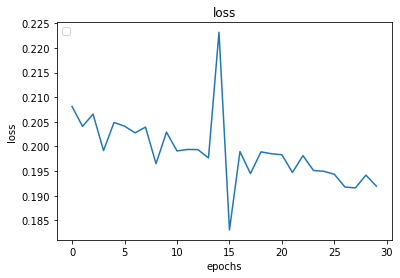

In [48]:
historyPlot = model.fit(X_train_reshaped,y_train_categorical, epochs=30, batch_size=1000)

plt.plot(historyPlot.history['loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.show()

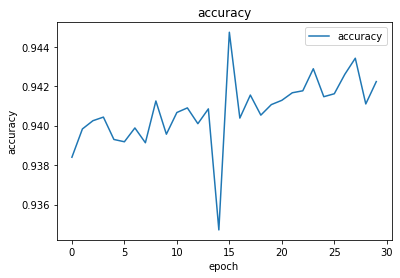

In [49]:
plt.plot(historyPlot.history['accuracy'])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper right')
plt.show()

In [37]:
# predict
model.evaluate(X_test_reshaped, y_test_categorical)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3152 - accuracy: 0.9166


[0.31521528137773275, 0.9166]

In [38]:
# score=model.evaluate(X_test_reshaped, y_test_categorical)
score=model.evaluate(X_train_reshaped, y_train_categorical)

60000/60000 [==============================] - 3s 43us/sample - loss: 0.3205 - accuracy: 0.9168


## Plot Results

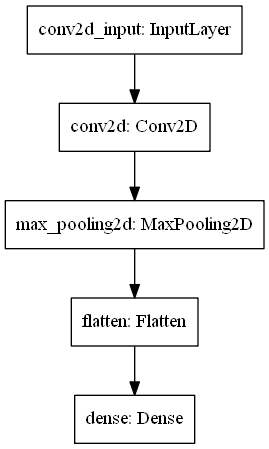

In [39]:
# tensorflow.keras.utils.plot_model(
plot_model(
    model,
    to_file="model_CNN.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)